In [109]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy.io import loadmat
sys.path.append("code/")
from utils import Generator, Discriminator, enable_gradients, disable_gradients
%matplotlib inline

# Load data and set constants

In [91]:
data_dict = loadmat("/home/shariqbal/data/train_32x32.mat")
real_imgs = np.transpose(data_dict['X'], (3, 0, 1, 2))

In [202]:
model_name = 'run1'
batch_size = 64
noise_dim = 128

In [203]:
disc_loss = np.load("models/%s/disc_loss.npy" % model_name)
gen_loss = np.load("models/%s/gen_loss.npy" % model_name)

# Plot Loss Functions

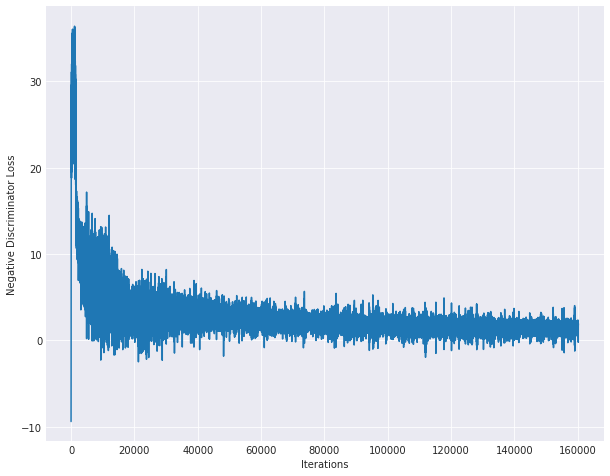

In [290]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,8))
    plt.ylabel("Negative Discriminator Loss")
    plt.xlabel("Iterations")
    plt.plot(-disc_loss);

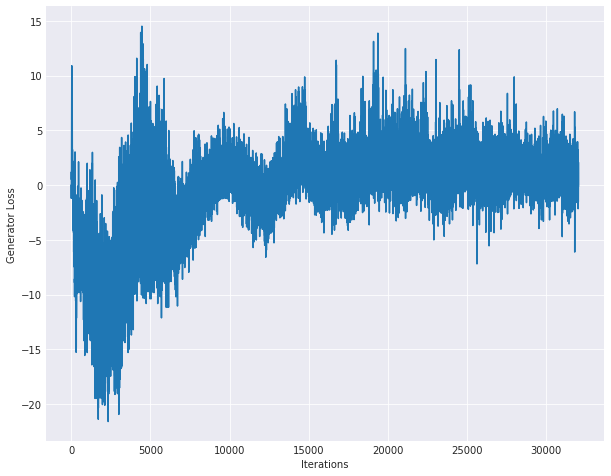

In [291]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,8))
    plt.ylabel("Generator Loss")
    plt.xlabel("Iterations")
    plt.plot(gen_loss);

# Load model and evaluate generated images

In [206]:
gen_net = Generator()
gen_net.load_state_dict(torch.load("models/%s/gen_net.pt" % model_name))
gen_net = gen_net.cuda()

In [268]:
gen_noise = torch.FloatTensor(batch_size, noise_dim).cuda()
gen_noise.normal_()
disable_gradients(gen_net)
gen_data_cuda = gen_net(gen_noise)
gen_data = np.transpose(gen_data_cuda.cpu().data.numpy(), axes=[0,3,2,1])
gen_imgs = (((gen_data + 1) / 2) * 255).astype("uint8")

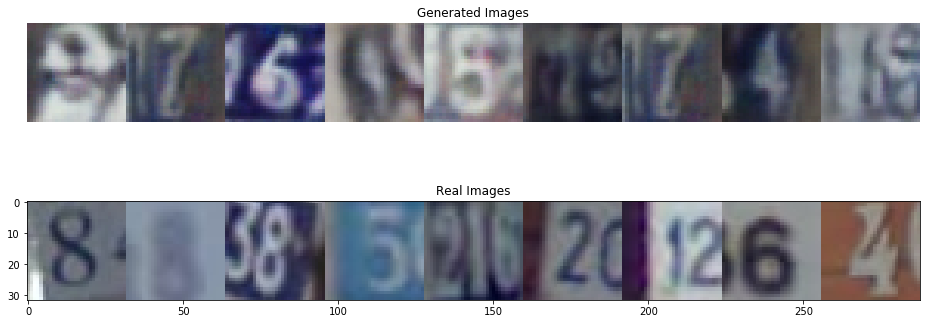

In [279]:
gen_indices = np.random.randint(len(gen_imgs), size=9)
real_indices = np.random.randint(len(real_imgs), size=9)

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 1)
plt.axis('off')
plt.title("Generated Images")
plt.imshow(np.hstack(gen_imgs[gen_indices]))
plt.subplot(2, 1, 2)
plt.title("Real Images")
plt.imshow(np.hstack(real_imgs[real_indices]));

# Generate interpolations between two points in random space

In [218]:
def interpolate_vectors(vec1, vec2, num):
    """
    Interpolate points between two vectors
    """
    return np.array([alpha * vec1 + (1 - alpha) * vec2 for alpha in np.linspace(0, 1, num)])

In [264]:
gen_interp_np = interpolate_vectors(np.random.normal(size=noise_dim),
                                    np.random.normal(size=noise_dim), 10).astype("float32")
gen_interp = torch.FloatTensor(gen_interp_np).cuda()

disable_gradients(gen_net)
gen_interp_cuda = gen_net(gen_interp)
gen_interp = np.transpose(gen_interp_cuda.cpu().data.numpy(), axes=[0,3,2,1])
gen_interp_imgs = (((gen_interp + 1) / 2) * 255).astype("uint8")

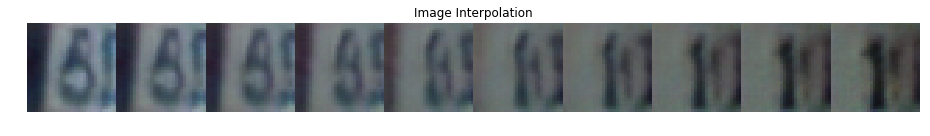

In [281]:
plt.figure(figsize=(16,6))
plt.axis('off')
plt.title("Image Interpolation")
plt.imshow(np.hstack(gen_interp_imgs));